## Import Libraries

In [35]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import load_model
import os
import joblib
import json

## Load and Explore Data

In [36]:
# Load dataset
df = pd.read_csv('../dataset/heart_attack_data.csv')

# Basic data exploration
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (158355, 28)

First 5 rows:


,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [37]:
# Data information
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  phys

In [38]:
# Descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())



Descriptive Statistics:


,age,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
count,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000
mean,54.543778,0.299069,0.199804,199.533264,0.249901,93.268504,0.300218,6.480064,129.515772,79.490809,110.736762,49.491478,129.569916,149.715885,0.200575,0.499770,0.601029,0.401004
std,11.910897,0.457851,0.399854,39.737565,0.432957,16.382205,0.458354,1.425398,15.005641,10.002964,27.673445,9.982634,34.913318,49.023473,0.400432,0.500002,0.489688,0.490103
min,25.000000,0.000000,0.000000,100.000000,0.000000,20.000000,0.000000,3.000000,61.000000,37.000000,70.000000,8.000000,-19.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,172.000000,0.000000,82.000000,0.000000,5.492985,119.000000,73.000000,89.000000,43.000000,106.000000,116.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,199.000000,0.000000,93.000000,0.000000,6.507461,130.000000,80.000000,109.000000,49.000000,130.000000,149.000000,0.000000,0.000000,1.000000,0.000000
75%,63.000000,1.000000,0.000000,226.000000,0.000000,104.000000,1.000000,7.520640,140.000000,86.000000,130.000000,56.000000,153.000000,183.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,350.000000,1.000000,173.000000,1.000000,9.000000,199.000000,127.000000,230.000000,93.000000,282.000000,380.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
# Missing values check
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               94848
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results                           0
previous_heart_disease                0


 ## Data Visualization

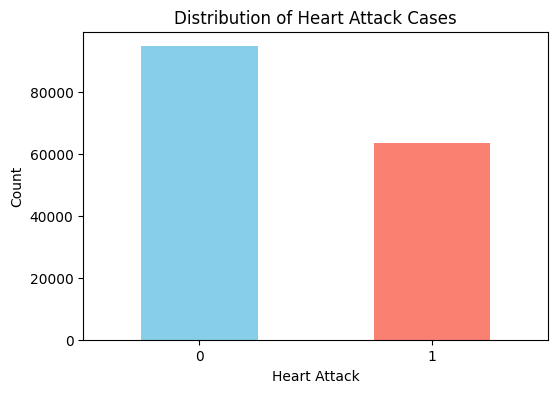

In [40]:
# Target distribution
plt.figure(figsize=(6, 4))
df['heart_attack'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Heart Attack Cases")
plt.xlabel("Heart Attack")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


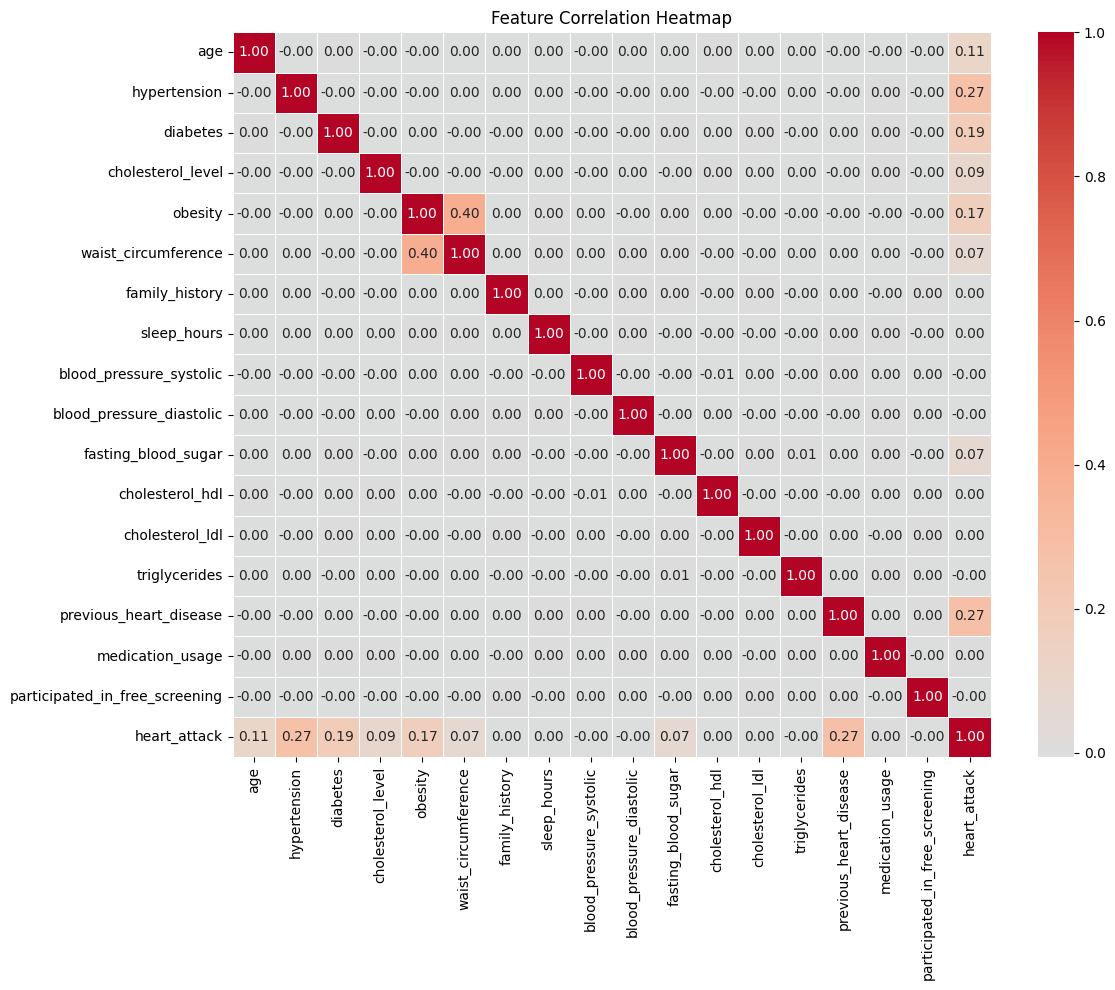

In [41]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

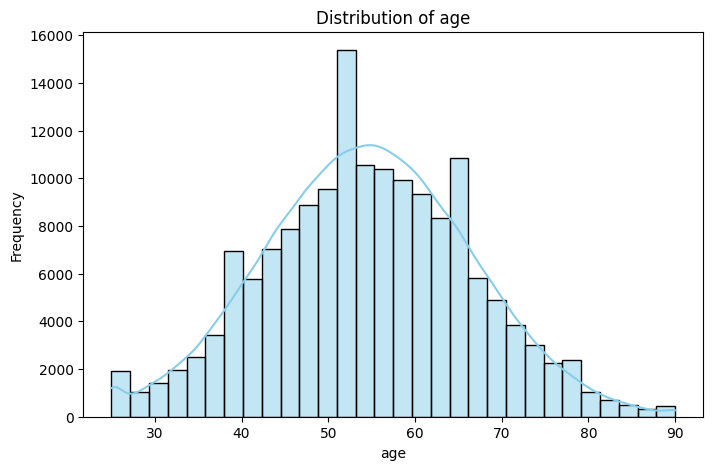

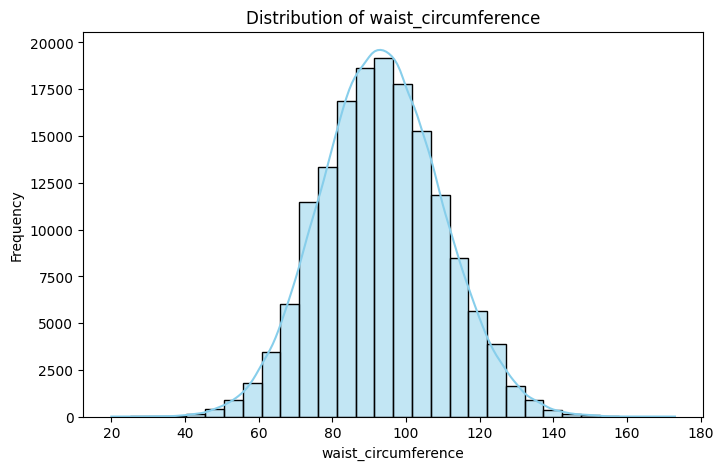

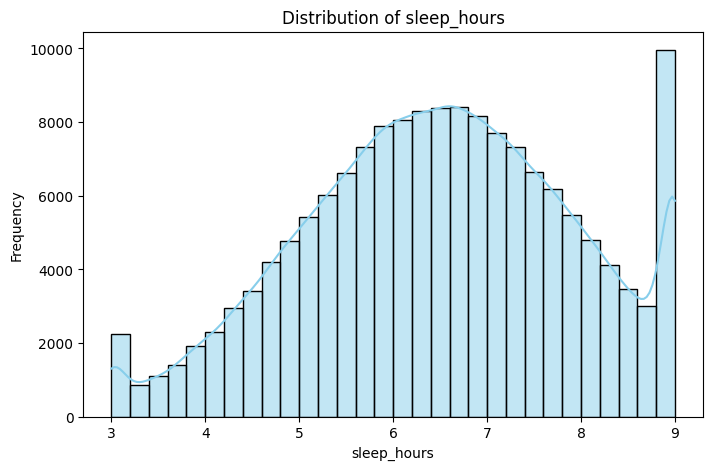

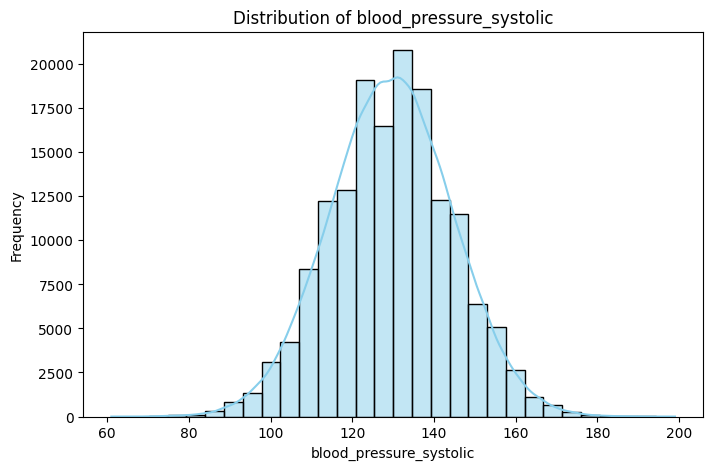

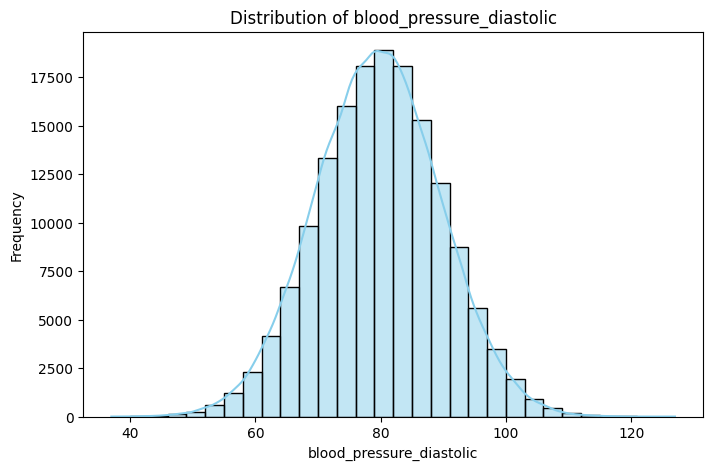

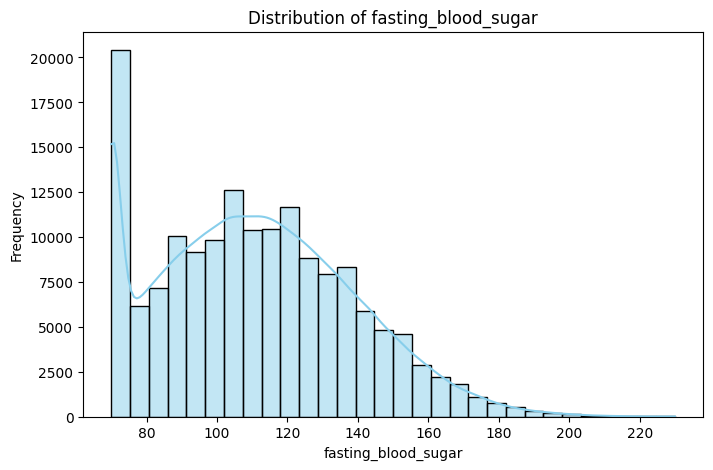

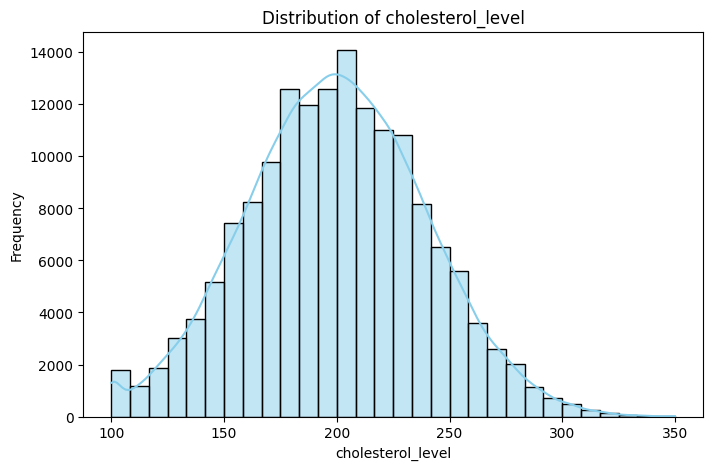

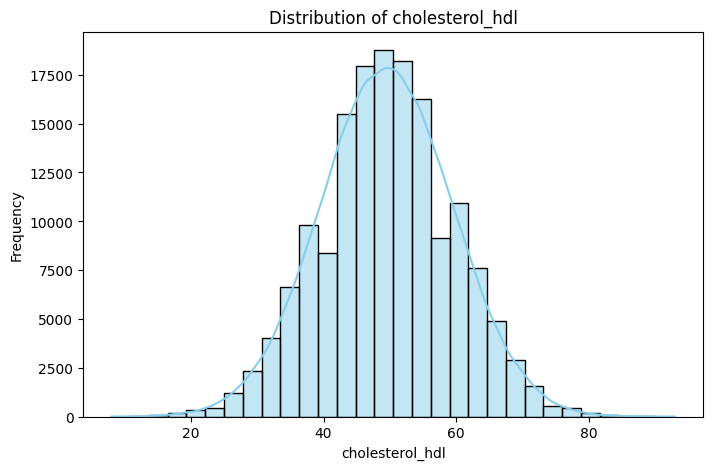

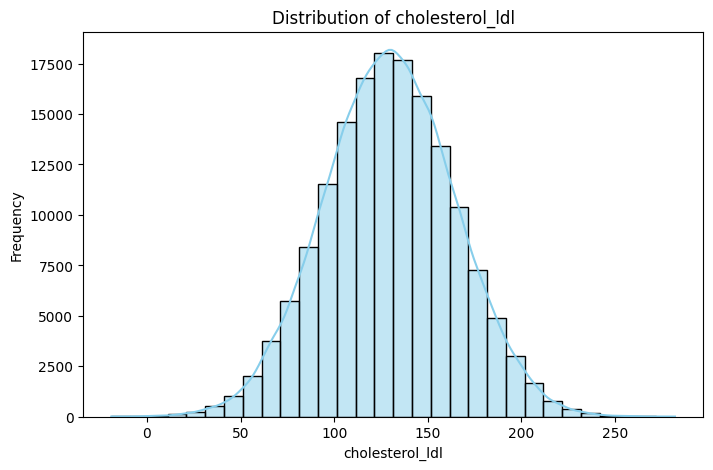

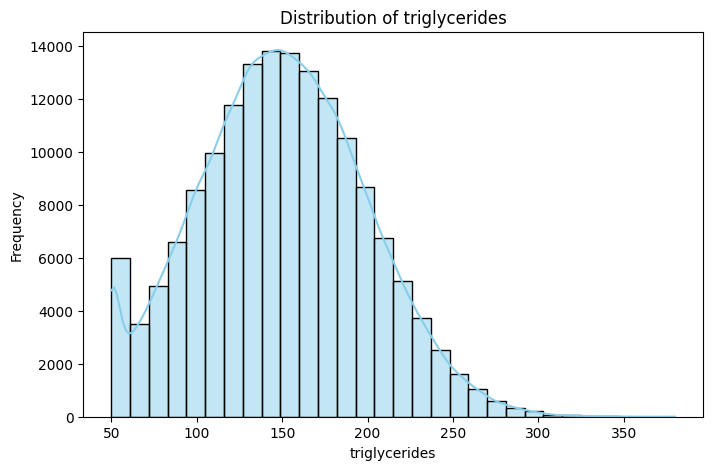

In [42]:
# Feature distributions
numerical_features = [
    'age', 'waist_circumference', 'sleep_hours',
    'blood_pressure_systolic', 'blood_pressure_diastolic',
    'fasting_blood_sugar', 'cholesterol_level',
    'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides'
]

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## Data Preprocessing

In [43]:
# Drop kolom yang tidak relevan atau berkorelasi sangat rendah
df = df.drop(columns=[
    'region', 'income_level', 'family_history', 'sleep_hours',
    'blood_pressure_systolic', 'blood_pressure_diastolic',
    'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
    'cholesterol_level', 'air_pollution_exposure',
    'physical_activity', 'dietary_habits', 'stress_level',
    'EKG_results'
], errors='ignore')

In [44]:
categorical_columns = ['gender', 'smoking_status', 'alcohol_consumption']
le_dict = {}

In [45]:
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # Simpan encoder tiap kolom

In [46]:
# Encode target variable
label_encoder = LabelEncoder()
df['heart_attack'] = label_encoder.fit_transform(df['heart_attack'])


In [47]:
numerical_columns = [
    'age', 'waist_circumference', 'triglycerides'
]

In [48]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [49]:
# Tampilkan data setelah preprocessing
print("Processed Data Sample:")
display(df.head())

Processed Data Sample:


,age,gender,hypertension,diabetes,obesity,waist_circumference,smoking_status,alcohol_consumption,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,0.458088,1,0,1,0,-0.626810,1,2,-0.993729,0,0,0,0
1,-0.129611,0,0,0,0,0.777156,2,2,-0.238986,1,0,1,0
2,0.626002,0,0,0,1,1.143409,2,1,0.434163,0,1,0,1
3,1.549529,1,1,0,0,-0.687852,1,1,-0.075798,0,1,1,0
4,-0.213568,1,1,0,0,-0.260558,0,1,-0.218588,1,0,1,1


## Train-Test Split

In [50]:
# Prepare features and target
X = df.drop('heart_attack', axis=1)
y = df['heart_attack']

In [51]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Maintain class distribution
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

Training set shape: (126684, 12)
Test set shape: (31671, 12)

Class distribution in training set:
heart_attack
0    0.598994
1    0.401006
Name: proportion, dtype: float64

Class distribution in test set:
heart_attack
0    0.599002
1    0.400998
Name: proportion, dtype: float64


## Model Building

In [52]:
# Determine number of classes
num_classes = len(y.unique())
print(f"Number of classes: {num_classes}")

Number of classes: 2


In [53]:
# Build neural network model
model = Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

In [54]:
# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [55]:
# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,978 (11.63 KB)

 Trainable params: 2,978 (11.63 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [56]:
# Early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [57]:
# Train model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50


3168/3168 ━━━━━━━━━━━━━━━━━━━━ 3s 930us/step - accuracy: 0.6842 - loss: 0.5823 - val_accuracy: 0.7216 - val_loss: 0.5354
Epoch 2/50
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 3s 893us/step - accuracy: 0.7217 - loss: 0.5385 - val_accuracy: 0.7239 - val_loss: 0.5304
Epoch 3/50
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 3s 898us/step - accuracy: 0.7205 - loss: 0.5357 - val_accuracy: 0.7240 - val_loss: 0.5311
Epoch 4/50
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 3s 891us/step - accuracy: 0.7254 - loss: 0.5338 - val_accuracy: 0.7224 - val_loss: 0.5296
Epoch 5/50
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 3s 875us/step - accuracy: 0.7264 - loss: 0.5309 - val_accuracy: 0.7244 - val_loss: 0.5283
Epoch 6/50
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 3s 882us/step - accuracy: 0.7221 - loss: 0.5321 - val_accuracy: 0.7248 - val_loss: 0.5298
Epoch 7/50
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 3s 919us/step - accuracy: 0.7257 - loss: 0.5301 - val_accuracy: 0.7229 - val_loss: 0.5289
Epoch 8/50
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 3s 907us/step - accuracy: 0.7206 - loss: 0.53

In [58]:
# Plot training history
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

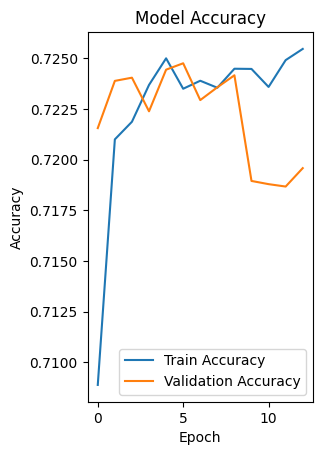

In [59]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

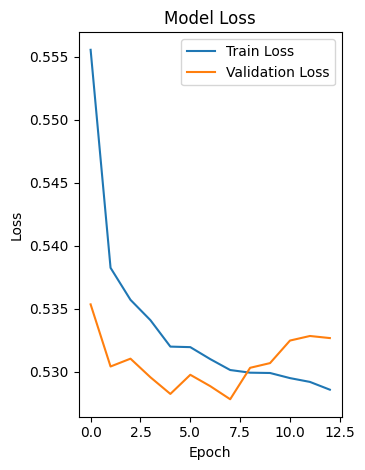

In [60]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

## Model Evaluation

In [61]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.7226
Test Loss: 0.5280


In [62]:
# Predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

990/990 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


In [63]:
# Classification report - FIXED VERSION
# Create meaningful target names based on label encoder classes
target_names = [f"Class {cls}" for cls in label_encoder.classes_]

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred,
    target_names=target_names,
    digits=4
))


Classification Report:
              precision    recall  f1-score   support

     Class 0     0.7345    0.8409    0.7841     18971
     Class 1     0.6967    0.5460    0.6122     12700

    accuracy                         0.7226     31671
   macro avg     0.7156    0.6934    0.6981     31671
weighted avg     0.7193    0.7226    0.7152     31671



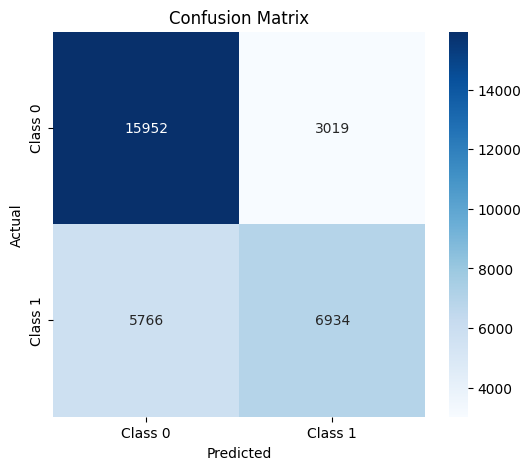

In [64]:
# Confusion matrix - FIXED VERSION
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Model Saving

In [65]:
try:
    # If running as a script .py
    current_script_path = os.path.dirname(os.path.abspath(__file__))
    PROJECT_ROOT = os.path.abspath(os.path.join(current_script_path, '..'))
except NameError:
    # If running in an interactive environment like Jupyter Notebook
    # Assumes notebook is in a subdirectory like 'capstone_model/notebooks/'
    PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
    # If your notebook is directly in 'capstone_model/', use:
    # PROJECT_ROOT = os.getcwd()

HEART_ATTACK_MODEL_ARTIFACTS_DIR = os.path.join(PROJECT_ROOT, 'heart-attack-model', 'saved_model_heart_attack')

if not os.path.exists(HEART_ATTACK_MODEL_ARTIFACTS_DIR):
    os.makedirs(HEART_ATTACK_MODEL_ARTIFACTS_DIR)
    print(f"Direktori artefak dibuat: {HEART_ATTACK_MODEL_ARTIFACTS_DIR}")
else:
    print(f"Direktori artefak sudah ada: {HEART_ATTACK_MODEL_ARTIFACTS_DIR}")

# --- Simpan Artefak ---

# 1. Model Keras
heart_attack_model_path = os.path.join(HEART_ATTACK_MODEL_ARTIFACTS_DIR, 'heart_attack_model.keras')
model.save(heart_attack_model_path)
print(f"Model Heart Attack disimpan di: {heart_attack_model_path}")

# 2. Scaler (StandardScaler)
# 'scaler' adalah objek StandardScaler yang sudah di-fit dari notebook Anda
scaler_path = os.path.join(HEART_ATTACK_MODEL_ARTIFACTS_DIR, 'heart_attack_scaler.pkl')
joblib.dump(scaler, scaler_path)
print(f"Scaler Heart Attack disimpan di: {scaler_path}")

# 3. Label Encoders untuk Fitur Kategorikal
# 'le_dict' adalah dictionary {nama_kolom_kategorikal: objek_LabelEncoder} dari notebook Anda
feature_le_dict_path = os.path.join(HEART_ATTACK_MODEL_ARTIFACTS_DIR, 'heart_attack_feature_le_dict.pkl')
joblib.dump(le_dict, feature_le_dict_path)
print(f"Dictionary Label Encoders untuk fitur disimpan di: {feature_le_dict_path}")

# 4. Label Encoder untuk Variabel Target
# 'label_encoder' adalah objek LabelEncoder yang di-fit pada kolom target 'heart_attack'
target_le_path = os.path.join(HEART_ATTACK_MODEL_ARTIFACTS_DIR, 'heart_attack_target_le.pkl')
joblib.dump(label_encoder, target_le_path)
print(f"Label Encoder untuk target disimpan di: {target_le_path}")

# 5. Daftar Fitur Input yang Dipilih (dalam urutan yang benar untuk model)
input_features_ordered = X.columns.tolist()
input_features_ordered_path = os.path.join(HEART_ATTACK_MODEL_ARTIFACTS_DIR, 'heart_attack_input_features_ordered.json')
with open(input_features_ordered_path, 'w') as f:
    json.dump(input_features_ordered, f)
print(f"Daftar fitur input Heart Attack (ordered) disimpan di: {input_features_ordered_path}")

print("\n--- Penyimpanan Artefak Model Heart Attack Selesai ---")

# Referensi fitur input untuk API (nama dan tipe data asli sebelum preprocessing)
print(f"\nFitur yang diharapkan API untuk model Heart Attack ({len(input_features_ordered)} fitur):")
df_original_for_types = pd.read_csv('../dataset/heart_attack_data.csv')
for feature_name in input_features_ordered:
    if feature_name in df_original_for_types.columns:
        original_dtype = df_original_for_types[feature_name].dtype
        print(f"- {feature_name} (Tipe data asli di dataset: {original_dtype})")
    else:
        print(f"- {feature_name} (Tipe data asli tidak dapat ditentukan dari df_original_for_types)")

# Menampilkan kelas target yang di-encode oleh target_label_encoder
print("\nMapping kelas target (dari target LabelEncoder):")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"Encoded: {i} -> Original: {class_name}")


Direktori artefak sudah ada: /home/arch/DBS/capstone_model/heart-attack-model/saved_model_heart_attack
Model Heart Attack disimpan di: /home/arch/DBS/capstone_model/heart-attack-model/saved_model_heart_attack/heart_attack_model.keras
Scaler Heart Attack disimpan di: /home/arch/DBS/capstone_model/heart-attack-model/saved_model_heart_attack/heart_attack_scaler.pkl
Dictionary Label Encoders untuk fitur disimpan di: /home/arch/DBS/capstone_model/heart-attack-model/saved_model_heart_attack/heart_attack_feature_le_dict.pkl
Label Encoder untuk target disimpan di: /home/arch/DBS/capstone_model/heart-attack-model/saved_model_heart_attack/heart_attack_target_le.pkl
Daftar fitur input Heart Attack (ordered) disimpan di: /home/arch/DBS/capstone_model/heart-attack-model/saved_model_heart_attack/heart_attack_input_features_ordered.json

--- Penyimpanan Artefak Model Heart Attack Selesai ---

Fitur yang diharapkan API untuk model Heart Attack (12 fitur):
- age (Tipe data asli di dataset: int64)
- gen

## Inference

In [68]:
try:
    # If running as a script .py
    # This assumes the inference script might be in a similar location or you adjust as needed
    current_script_path = os.path.dirname(os.path.abspath(__file__))
    PROJECT_ROOT = os.path.abspath(os.path.join(current_script_path, '..'))
except NameError:
    # If running in an interactive environment like Jupyter Notebook
    # Adjust if your notebook for inference is in a different location
    PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
    # If your notebook is directly in 'capstone_model/', use:
    # PROJECT_ROOT = os.getcwd()

HEART_ATTACK_MODEL_ARTIFACTS_DIR = os.path.join(PROJECT_ROOT, 'heart-attack-model', 'saved_model_heart_attack')

print(f"Loading artifacts from: {HEART_ATTACK_MODEL_ARTIFACTS_DIR}")

# --- Load Artifacts ---

# 1. Model Keras
heart_attack_model_path = os.path.join(HEART_ATTACK_MODEL_ARTIFACTS_DIR, 'heart_attack_model.keras')
if os.path.exists(heart_attack_model_path):
    model = tf.keras.models.load_model(heart_attack_model_path)
    print(f"Model loaded from: {heart_attack_model_path}")
else:
    raise FileNotFoundError(f"Model file not found: {heart_attack_model_path}")

# 2. Scaler (StandardScaler)
scaler_path = os.path.join(HEART_ATTACK_MODEL_ARTIFACTS_DIR, 'heart_attack_scaler.pkl')
if os.path.exists(scaler_path):
    scaler = joblib.load(scaler_path)
    print(f"Scaler loaded from: {scaler_path}")
else:
    raise FileNotFoundError(f"Scaler file not found: {scaler_path}")

# 3. Label Encoders for Fitur Kategorikal
feature_le_dict_path = os.path.join(HEART_ATTACK_MODEL_ARTIFACTS_DIR, 'heart_attack_feature_le_dict.pkl')
if os.path.exists(feature_le_dict_path):
    feature_le_dict = joblib.load(feature_le_dict_path)
    print(f"Feature Label Encoders loaded from: {feature_le_dict_path}")
else:
    raise FileNotFoundError(f"Feature LE dictionary not found: {feature_le_dict_path}")

# 4. Label Encoder for Variabel Target
target_le_path = os.path.join(HEART_ATTACK_MODEL_ARTIFACTS_DIR, 'heart_attack_target_le.pkl')
if os.path.exists(target_le_path):
    target_label_encoder = joblib.load(target_le_path)
    print(f"Target Label Encoder loaded from: {target_le_path}")
else:
    raise FileNotFoundError(f"Target LE file not found: {target_le_path}")

# 5. Daftar Fitur Input yang Dipilih (dalam urutan yang benar untuk model)
input_features_ordered_path = os.path.join(HEART_ATTACK_MODEL_ARTIFACTS_DIR, 'heart_attack_input_features_ordered.json')
if os.path.exists(input_features_ordered_path):
    with open(input_features_ordered_path, 'r') as f:
        input_features_ordered = json.load(f)
    print(f"Ordered input features loaded from: {input_features_ordered_path}")
else:
    raise FileNotFoundError(f"Input features file not found: {input_features_ordered_path}")

# Define which columns were numerical and categorical during training (based on your preprocessing)
# These were the columns scaled by StandardScaler
numerical_columns_for_scaling = [
    'age', 'waist_circumference', 'triglycerides'
]
# These were the columns encoded by LabelEncoder
categorical_columns_for_encoding = ['gender', 'smoking_status', 'alcohol_consumption']

def predict_heart_attack(input_data_dict):
    # Convert input dictionary to DataFrame
    df_input = pd.DataFrame([input_data_dict])

    # --- Preprocessing ---
    # 1. Encode categorical features
    for col in categorical_columns_for_encoding:
        if col in df_input.columns:
            le = feature_le_dict[col]
            # Ensure the input type matches what the encoder expects (usually string)
            # Use try-except to handle cases where a category might be unseen by a specific encoder
            try:
                df_input[col] = le.transform(df_input[col].astype(str))
            except ValueError as e:
                # Handle unseen labels: either raise error, or assign a default/impute
                # For now, we'll raise an error to be explicit
                raise ValueError(f"Unseen label in column '{col}': {df_input[col].iloc[0]}. Error: {e}. "
                                 f"Known categories: {list(le.classes_)}")
        else:
            raise ValueError(f"Missing categorical column in input: {col}")

    # 2. Scale numerical features
    # Make sure to only scale columns that are present and are in numerical_columns_for_scaling
    cols_to_scale_present = [col for col in numerical_columns_for_scaling if col in df_input.columns]
    if not all(col in df_input.columns for col in numerical_columns_for_scaling):
        missing_numerical = set(numerical_columns_for_scaling) - set(df_input.columns)
        raise ValueError(f"Missing numerical column(s) in input: {missing_numerical}")

    if cols_to_scale_present:
        df_input[cols_to_scale_present] = scaler.transform(df_input[cols_to_scale_present])
    
    # 3. Ensure correct feature order
    # This is crucial as the model expects features in a specific sequence
    try:
        df_processed = df_input[input_features_ordered]
    except KeyError as e:
        raise ValueError(f"Input data does not have the correct features or order. Expected: {input_features_ordered}. Error: {e}")

    # --- Prediction ---
    pred_proba = model.predict(df_processed) # Probabilities for each class
    predicted_class_index = np.argmax(pred_proba, axis=1)[0] # Index of the class with highest probability

    # --- Post-processing ---
    # Convert predicted index back to original label (e.g., 'Yes', 'No')
    predicted_label_str = target_label_encoder.inverse_transform([predicted_class_index])[0]
    
    # Get the probability of the predicted class
    prediction_confidence = float(pred_proba[0][predicted_class_index])

    return predicted_label_str, prediction_confidence, pred_proba[0]

# ## Example Usage

sample_input_1 = {
    'age': 65,
    'gender': 'Male',
    'hypertension': 1,  # Contoh nilai, sesuaikan
    'diabetes': 0,      # Contoh nilai, sesuaikan
    'obesity': 1,       # Contoh nilai, sesuaikan
    'waist_circumference': 102.5,
    'smoking_status': 'Past',
    'alcohol_consumption': 'High',
    'triglycerides': 180.0,
    'previous_heart_disease': 1, # Contoh nilai, sesuaikan
    'medication_usage': 0,       # Contoh nilai, sesuaikan
    'participated_in_free_screening': 1 # Contoh nilai, sesuaikan
}

sample_input_2 = {
    'age': 45,
    'gender': 'Female',
    'hypertension': 0,
    'diabetes': 0,
    'obesity': 0,
    'waist_circumference': 75.0,
    'smoking_status': 'Never',
    'alcohol_consumption': 'Moderate', # Pastikan 'Moderate' ada di feature_le_dict['alcohol_consumption'].classes_
    'triglycerides': 120.0,
    'previous_heart_disease': 0,
    'medication_usage': 0,
    'participated_in_free_screening': 0
}

sample_input_3_high_risk = {
    'age': 70,
    'gender': 'Male',
    'hypertension': 1,
    'diabetes': 1,
    'obesity': 1,
    'waist_circumference': 110.0, # Pastikan float jika di-scale sebagai float
    'smoking_status': 'Current',
    'alcohol_consumption': 'High', # Pastikan 'High' ada di feature_le_dict['alcohol_consumption'].classes_
    'triglycerides': 250.0,
    'previous_heart_disease': 1,
    'medication_usage': 1,
    'participated_in_free_screening': 0
}

print("--- Performing Inference ---")

for i, sample_data in enumerate([sample_input_1, sample_input_2, sample_input_3_high_risk]):
    print(f"\n--- Sample Input {i+1} ---")
    print(json.dumps(sample_data, indent=2))
    try:
        predicted_label, confidence, all_probabilities = predict_heart_attack(sample_data)
        print(f"\nPredicted Heart Attack: {predicted_label}")
        print(f"Confidence: {confidence:.4f}")
        
        print("Probabilities per class:")
        class_meaning = {0: "No Heart Attack (0)", 1: "Heart Attack (1)"} # Based on common conventions

        for idx, class_val_from_encoder in enumerate(target_label_encoder.classes_):
            # class_val_from_encoder will be 0, then 1 based on your output
            print(f"  Class '{class_meaning.get(class_val_from_encoder, str(class_val_from_encoder))}': {all_probabilities[idx]:.4f}")
            
    except ValueError as e:
        print(f"Error during prediction for sample {i+1}: {e}")
    except Exception as e:
        print(f"An unexpected error occurred for sample {i+1}: {e}")

print("\n--- Inference Examples Complete ---")

# Display mapping for clarity
print("\nTarget Label Encoder Mapping:")
for i, class_name in enumerate(target_label_encoder.classes_):
    print(f"Encoded: {i} -> Original: {class_name}")

print("\nFeature Label Encoders - Example 'gender':")
if 'gender' in feature_le_dict:
    gender_le = feature_le_dict['gender']
    for i, class_name in enumerate(gender_le.classes_):
        print(f"Encoded: {i} -> Original '{class_name}' (for gender)")

print("\nFeature Label Encoders - 'smoking_status' (actual classes used by model):")
if 'smoking_status' in feature_le_dict:
    smoking_le = feature_le_dict['smoking_status']
    for i, class_name in enumerate(smoking_le.classes_):
        print(f"Encoded: {i} -> Original '{class_name}' (for smoking_status)")

Loading artifacts from: /home/arch/DBS/capstone_model/heart-attack-model/saved_model_heart_attack
Model loaded from: /home/arch/DBS/capstone_model/heart-attack-model/saved_model_heart_attack/heart_attack_model.keras
Scaler loaded from: /home/arch/DBS/capstone_model/heart-attack-model/saved_model_heart_attack/heart_attack_scaler.pkl
Feature Label Encoders loaded from: /home/arch/DBS/capstone_model/heart-attack-model/saved_model_heart_attack/heart_attack_feature_le_dict.pkl
Target Label Encoder loaded from: /home/arch/DBS/capstone_model/heart-attack-model/saved_model_heart_attack/heart_attack_target_le.pkl
Ordered input features loaded from: /home/arch/DBS/capstone_model/heart-attack-model/saved_model_heart_attack/heart_attack_input_features_ordered.json
--- Performing Inference ---

--- Sample Input 1 ---
{
  "age": 65,
  "gender": "Male",
  "hypertension": 1,
  "diabetes": 0,
  "obesity": 1,
  "waist_circumference": 102.5,
  "smoking_status": "Past",
  "alcohol_consumption": "High",
  